# Capstone 2: Pre-processing and Training Data Development**

About the data
This dataset contains information on energy consumption and various weather parameters such as solar radiation, temperature, pressure, humidity, wind speed, and precipitation. The "Energy delta[Wh]" column represents the change in energy consumption over a certain time period, while the "GHI" column measures the Global Horizontal Irradiance, which is the amount of solar radiation received by a horizontal surface. The dataset also includes information on the presence of sunlight ("isSun"), the length of daylight ("dayLength"), and the amount of time during which sunlight is available ("sunlightTime"). The "weather_type" column provides information on the overall weather conditions such as clear, cloudy, or rainy. The dataset is organized by hour and month, making it ideal for studying the relationship between renewable energy generation and weather patterns over time.
This text above is taken from the source of the data: https://www.kaggle.com/code/totoro29/renewable-energy-analysis

I'd like to investigate the relationship between the consumption of energy and how it is affected by the changing weather conditions. This is relevant information to be able to forecast and anticipate the potential renewable energy demand depending on the different weather conditions.

In the previous Capstone 2 project I did the EDA and saved the file with the output data from that work. Saved as: Capstone2_EDA.csv

In [28]:
#import pandas, numpy, matlab, seaborn

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')


In [29]:
# Import data from previous EDA step
df = pd.read_csv('/Users/claudiazaffaroni/Desktop/Springboard_Data_Science_Course/Unit 16 Feature Engineering/Capstone 2 PreProcessing & Training Data Development/Capstone2_EDA.csv')

In [30]:
# Take a look at the first few rows
df.head()

,Time,Energy_delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [31]:
df.columns

Index(['Time', 'Energy_delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy_delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [33]:
df['Time'] = pd.to_datetime(df['Time'])

In [34]:
# Convert datetime64 into Unix timestamp (numeric)
df['Time_num'] = df['Time'].astype(int) // 10**9  # Convert to Unix timestamp

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196776 non-null  datetime64[ns]
 1   Energy_delta[Wh]        196776 non-null  int64         
 2   GHI                     196776 non-null  float64       
 3   temp                    196776 non-null  float64       
 4   pressure                196776 non-null  int64         
 5   humidity                196776 non-null  int64         
 6   wind_speed              196776 non-null  float64       
 7   rain_1h                 196776 non-null  float64       
 8   snow_1h                 196776 non-null  float64       
 9   clouds_all              196776 non-null  int64         
 10  isSun                   196776 non-null  int64         
 11  sunlightTime            196776 non-null  int64         
 12  dayLength               196776

In [36]:
#Call the info method on df to see a summary of the columns and data types

df.describe(include='all')

,Time,Energy_delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Time_num
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,1.967760e+05
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-08-31 17:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329,1.572389e+09
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066,5.136363e+07
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000,1.483229e+09
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000,1.527935e+09


# Step 1: Create dummy or indicator features for categorical variables.

In [37]:
# In this case the columns 'isSun' and 'weather_type' are examples of columns that could have been categorical 
# but they were already converted to numerical types in the data set I chose. So I'll use these 2 columns 
# to explore the get_dummies() feature. 

df_drop = ['isSun', 'weather_type']
df_o = pd.get_dummies(df[df_drop], columns = df_drop)
df = df.drop(columns = df_drop)
df_1 = pd.concat([df, df_o], axis=1)

In [38]:
df_1.describe(include='all')

,Time,Energy_delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,...,hour,month,Time_num,isSun_0,isSun_1,weather_type_1,weather_type_2,weather_type_3,weather_type_4,weather_type_5
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,...,196776.000000,196776.000000,1.967760e+05,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-08-31 17:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,...,11.498902,6.298329,1.572389e+09,0.480038,0.519962,0.142172,0.180042,0.160894,0.371001,0.145892
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,...,6.921887,3.376066,5.136363e+07,0.499603,0.499603,0.349227,0.384224,0.367434,0.483074,0.352999
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.483229e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,...,5.000000,3.000000,1.527935e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
# List columns
df_1.columns

Index(['Time', 'Energy_delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime',
       'dayLength', 'SunlightTime/daylength', 'hour', 'month', 'Time_num',
       'isSun_0', 'isSun_1', 'weather_type_1', 'weather_type_2',
       'weather_type_3', 'weather_type_4', 'weather_type_5'],
      dtype='object')

**<font color='teal'> Plot histograms of each column. </font>**

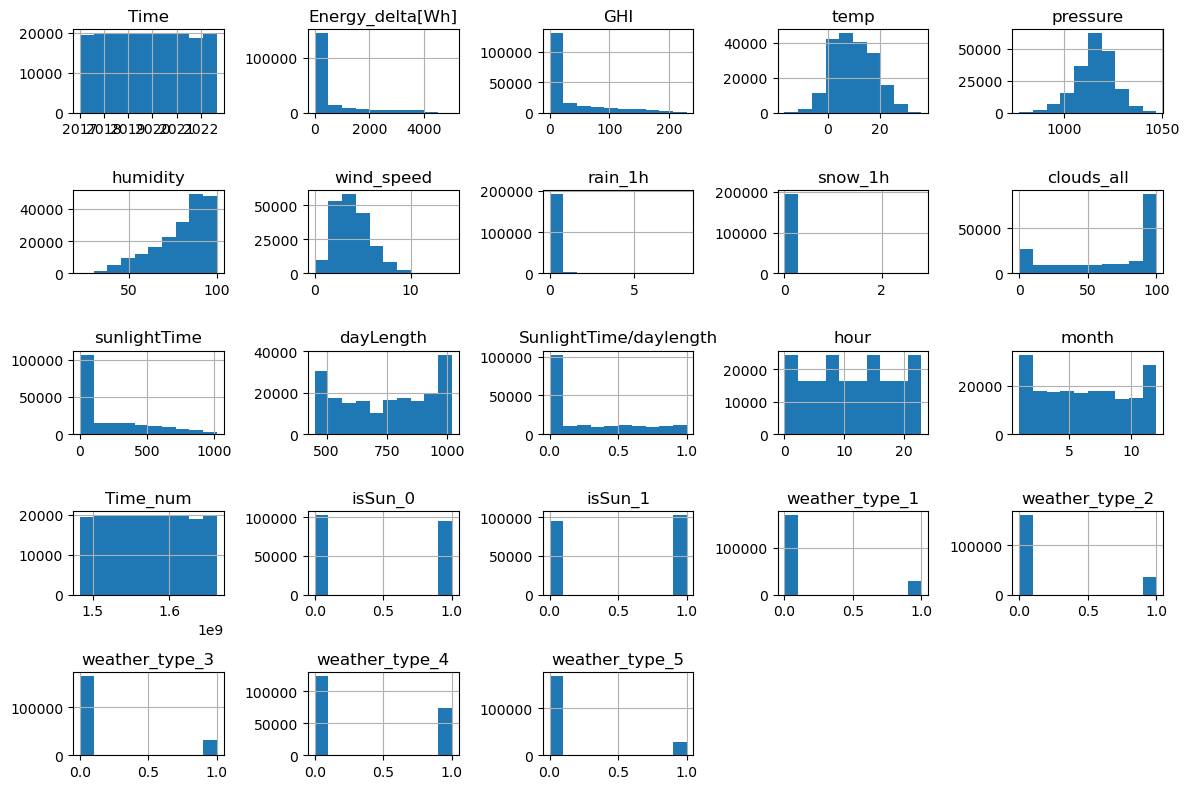

In [40]:
df_1.hist(figsize=(12, 8))  # figsize adjusts the size of the plot
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


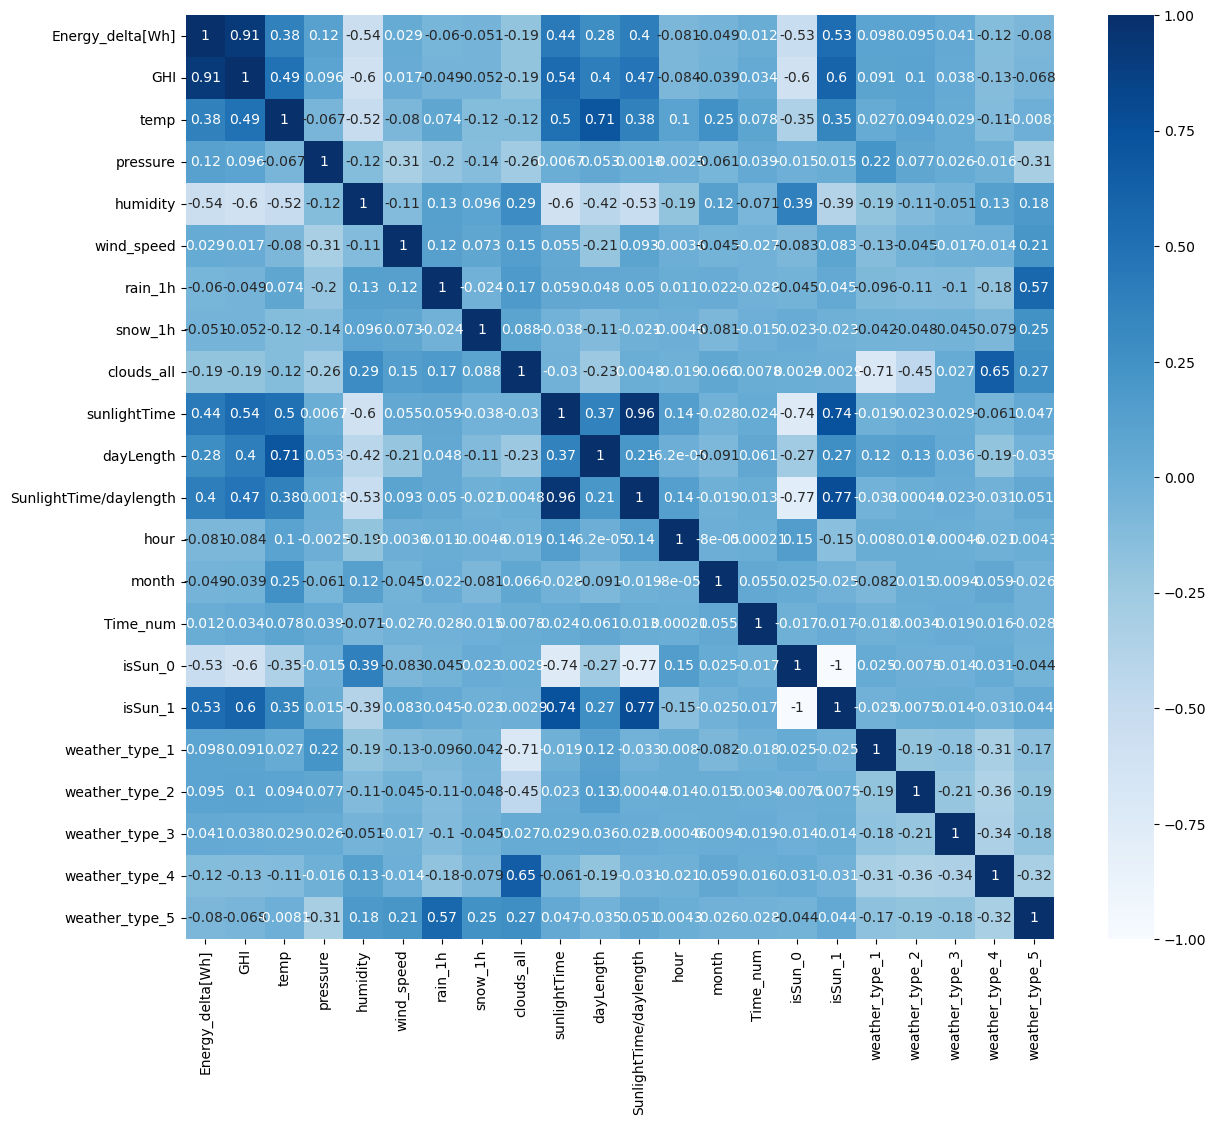

In [41]:
plt.figure(figsize=(14,12))
print('Correlation between various features')
p=sns.heatmap(df_1.corr(), annot=True, cmap ='Blues')

In [42]:
# See that when energy consumption is zero how many other variables are also zero.
target_column = 'Energy_delta[Wh]' 

# Step 2: Filter rows where energy consumption is zero
zero_target_rows = df_1[df_1[target_column] == 0]

# Step 3: Count how many zeros there are in each column of the filtered DataFrame
zero_counts = zero_target_rows.eq(0).sum()

# Display the counts
print(zero_counts)

Time                           0
Energy_delta[Wh]          100850
GHI                        94908
temp                         789
pressure                       0
humidity                       0
wind_speed                     4
rain_1h                    89576
snow_1h                    98161
clouds_all                  6723
sunlightTime               94460
dayLength                      0
SunlightTime/daylength     94460
hour                        8200
month                          0
Time_num                       0
isSun_0                     6390
isSun_1                    94460
weather_type_1             86141
weather_type_2             83382
weather_type_3             85389
weather_type_4             61601
weather_type_5             86887
dtype: int64


# Step 2: Split your data into testing and training datasets

In [43]:
# import necessary packages

from sklearn.model_selection import train_test_split


In [44]:
# create 'y' variable

y = df_1[['Energy_delta[Wh]']]
y.columns

Index(['Energy_delta[Wh]'], dtype='object')

In [45]:
# drop the column we want to predict

X = df_1.drop(columns=['Energy_delta[Wh]','Time'])
X.columns

Index(['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength',
       'SunlightTime/daylength', 'hour', 'month', 'Time_num', 'isSun_0',
       'isSun_1', 'weather_type_1', 'weather_type_2', 'weather_type_3',
       'weather_type_4', 'weather_type_5'],
      dtype='object')

In [46]:
# Divide the complete dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Step 3: Standardize the magnitude of numeric features using a scaler.

In [47]:
from sklearn import preprocessing

# Making a Scaler object
scaler = preprocessing.StandardScaler()

#  Fit the scaler on the training data
scaler.fit(X_train)

# Transform (scale) both the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.head())
print(X_test.head())

        GHI  temp  pressure  humidity  wind_speed  rain_1h  snow_1h  \
26743   9.9  15.1      1012        88         5.6      0.0      0.0   
179529  0.0  -2.8      1026        93         2.1      0.0      0.0   
56905   0.0  18.0      1021        59         2.4      0.0      0.0   
139668  0.0  -0.2      1007        92         3.2      0.0      0.0   
120568  0.0  13.5      1016        88         1.3      0.0      0.0   

        clouds_all  sunlightTime  dayLength  ...  hour  month    Time_num  \
26743          100           525        660  ...    13     10  1507729500   
179529          46             0        675  ...     2      3  1646446500   
56905            1             0        870  ...    18      8  1534875300   
139668         100             0        450  ...    21     12  1609448400   
120568          48             0       1020  ...    22      6  1592258400   

        isSun_0  isSun_1  weather_type_1  weather_type_2  weather_type_3  \
26743         0        1          

In [48]:
# Save the DataFrame to a CSV file

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
